In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data =pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.shape


(2200, 8)

In [ ]:
data.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.apply(lambda x: len(x.unique()))


N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:
data['label'].value_counts()


blackgram      100
papaya         100
cotton         100
watermelon     100
mungbean       100
banana         100
maize          100
coffee         100
pomegranate    100
kidneybeans    100
pigeonpeas     100
apple          100
mothbeans      100
muskmelon      100
grapes         100
orange         100
jute           100
rice           100
coconut        100
lentil         100
chickpea       100
mango          100
Name: label, dtype: int64

<AxesSubplot:>

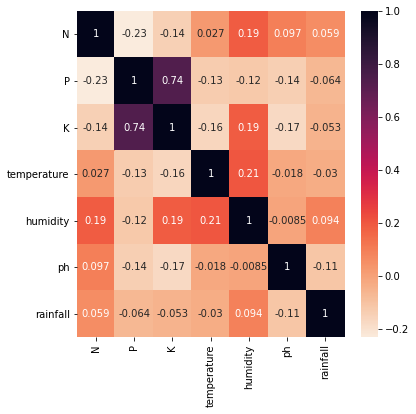

In [ ]:
f,ax=plt.subplots(figsize=(6,6))
corr=data.corr()
sns.heatmap(corr , ax=ax ,   cmap="rocket_r" ,annot =True)

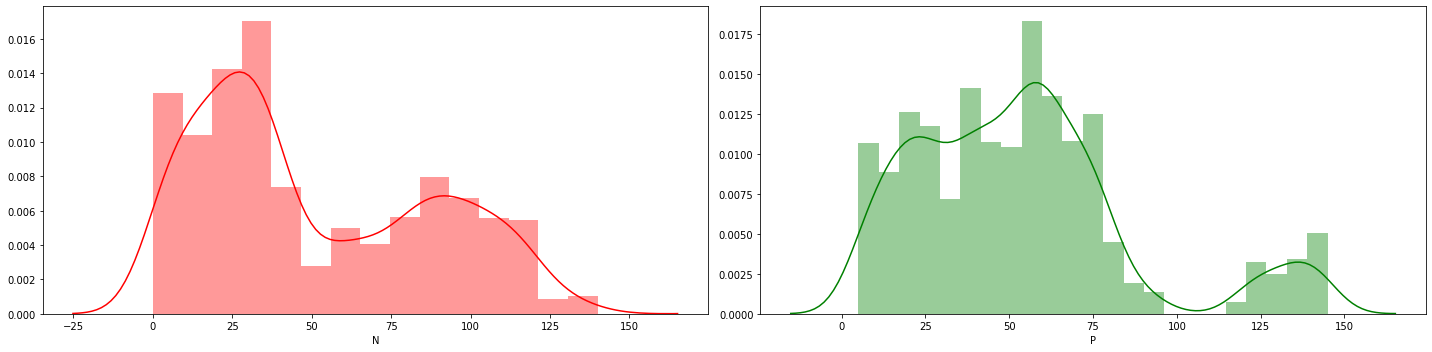

In [ ]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['N'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['P'] , color ='green' , ax = ax)
plt.tight_layout()

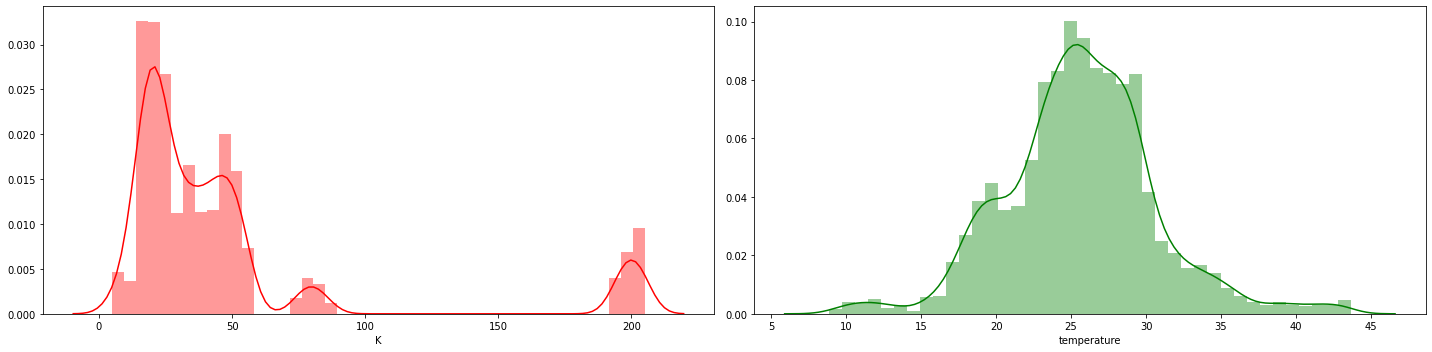

In [ ]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['K'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['temperature'] , color ='green' , ax = ax)
plt.tight_layout()

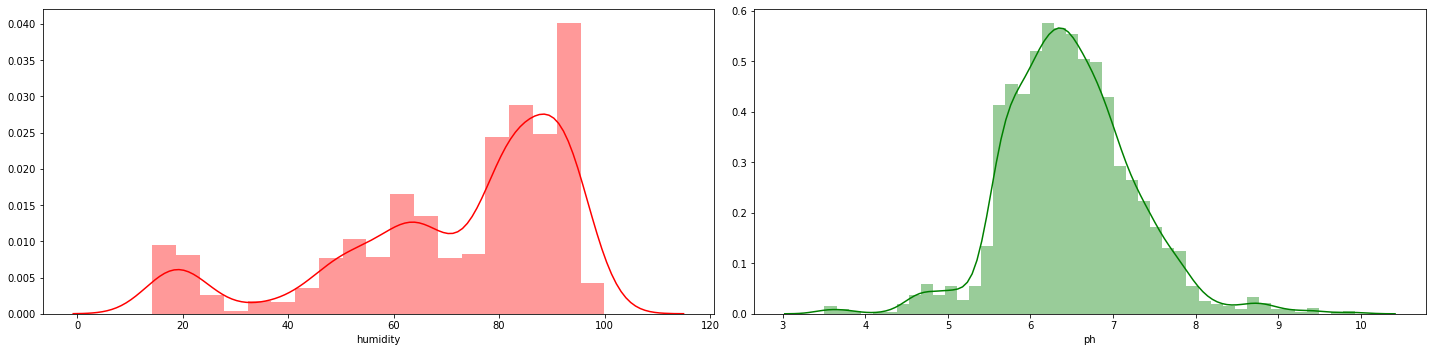

In [ ]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['humidity'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['ph'] , color ='green' , ax = ax)
plt.tight_layout()

<AxesSubplot:xlabel='rainfall'>

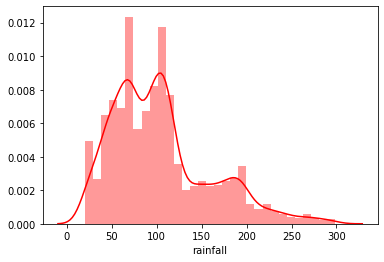

In [ ]:
sns.distplot(data['rainfall'],color ='red')


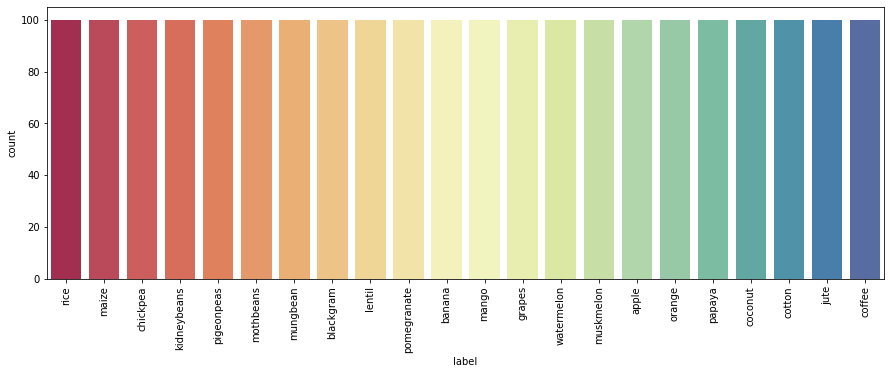

In [ ]:
f= plt.figure(figsize=(15,5))
sns.countplot(data['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = data.drop('label' ,axis =1)


In [ ]:
X.head()


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [ ]:
y = data['label']
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int32

In [ ]:
model = []
accuracy = []
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [ ]:
predict = DT.predict(X_test)
DT_accuracy = DT.score(X_test,y_test)
DT_accuracy

0.9818181818181818

In [ ]:
accuracy.append(DT_accuracy)
model.append('Decision Tree')

In [ ]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train , y_train)

C:\Users\Rahangdale\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LG_accuracy = LG.score(X_test,y_test)
LG_accuracy

0.9454545454545454

In [ ]:
accuracy.append(LG_accuracy)
model.append('Logistic Regression')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
RF_accuracy = RF.score(X_test,y_test)
RF_accuracy

0.9931818181818182

In [ ]:
accuracy.append(RF_accuracy)
model.append('Random Forest')
model

['Decision Tree', 'Logistic Regression', 'Random Forest']

In [ ]:
accuracy

[0.9818181818181818, 0.9454545454545454, 0.9931818181818182]

In [1]:
sns.barplot(x = model , y = accuracy ,palette ='Spectral')

NameError: ignored